# Perceptron

## Fungsi-fungsi *Plotting*

Jangan mengubah kode pada *cell* di bawah ini.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def line(w, th=0):
    w2 = w[2] + .001 if w[2] == 0 else w[2]

    return lambda x: (th - w[1] * x - w[0]) / w2


def plot(f1, f2, X, target, padding=1, marker='o'):
    X = np.array(X)

    x_vals, y_vals = X[:, 1], X[:, 2]
    xmin, xmax, ymin, ymax = x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()
    markers = f'r{marker}', f'b{marker}'
    line_x = np.arange(xmin-padding-1, xmax+padding+1)

    for c, v in enumerate(np.unique(target)):
        p = X[np.where(target == v)]

        plt.plot(p[:,1], p[:,2], markers[c])

    plt.axis([xmin-padding, xmax+padding, ymin-padding, ymax+padding])
    plt.plot(line_x, f1(line_x))
    plt.plot(line_x, f2(line_x))
    plt.show()

## Praktikum

### a) Fungsi *Step* Perceptron

Tulis kode ke dalam *cell* di bawah ini:

In [2]:
def percep_step(input, th=0):
  return 1 if input > th else -1 if input < -th else 0

### b) Fungsi *training* Perceptron

Tulis kode ke dalam *cell* di bawah ini:

In [3]:
def percep_fit(X, target, th=0, a=1, max_epoch=10, verbose=False, draw=False):
  w = np.zeros(len(X[0]) + 1)
  bias = np.ones((len(X), 1))
  X = np.hstack((bias, X))
  stop = False
  epoch = 0
  while not stop and (max_epoch == -1 or epoch < max_epoch):
    stop = True
    epoch += 1
    if verbose:
      print('\nEpoch', epoch)
      for r, row in enumerate(X):
        y_in = np.dot(row, w)
        y = percep_step(y_in, th)
        if y != target[r]:
          stop = False
          w = [w[i] + a * target[r] * row[i] for i in range(len(row))]
          if verbose:
            print('Bobot:', w)
          if draw:
            plot(line(w, th), line(w, -th), X, target)
  return w, epoch


### c) Fungsi *testing* Perceptron

Tulis kode ke dalam *cell* di bawah ini:

In [4]:
def percep_predict(X, w, th=0):
    Y = []
    for x in X:
        y_in = w[0] + np.dot(x, w[1:])
        y = percep_step(y_in, th)
        Y.append(y)
    return Y

In [5]:
def calc_accuracy(a, b):
    s = [1 if a[i] == b[i] else 0 for i in range(len(a))]
    return sum(s) / len(a)


## Soal


Gunakan dataset "data.csv" yang telah dilampirkan

In [24]:
from google.colab import files
import pandas as pd


uploaded = files.upload()

data = pd.read_csv('data.csv')
print(data.head())

Saving data.csv to data (4).csv
          x         y         z  Activity
0  0.288585 -0.020294 -0.132905  STANDING
1  0.278419 -0.016411 -0.123520  STANDING
2  0.279653 -0.019467 -0.113462  STANDING
3  0.279174 -0.026201 -0.123283  STANDING
4  0.276629 -0.016570 -0.115362  STANDING


Kolom Activity berperan sebagai label dan memiliki beberapa kelas:
1. SITTING
2. LAYING
3. WALKING
4. STANDING
5. WALKING_DOWNSTAIRS
6. WALKING_UPSTAIRS

Hapuslah kelas hingga hanya menyisakan kelas: LAYING dan WALKING_UPSTAIRS

In [25]:
data = data[~data['Activity'].isin(['SITTING', 'WALKING','STANDING','WALKING_DOWNSTAIRS'])] #Praktikan menghapus kelas kelas yang tidak digunakan

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale

X = data[['x', 'y', 'z']].to_numpy()
X = minmax_scale(X)

y = data['Activity'].to_numpy()
c = {'LAYING': 1, 'WALKING_UPSTAIRS': -1} # Praktikan mengubah kedua kelas target  menjadi 1 dan -1
y = [c[i] for i in y]

X_train, X_test, y_train, y_test = train_test_split(X, y,  train_size=10, test_size=.3)


Epoch 1
Bobot: [-0.0001, -8.547621365627792e-05, -8.446670551765884e-05, -6.934508361931791e-05]


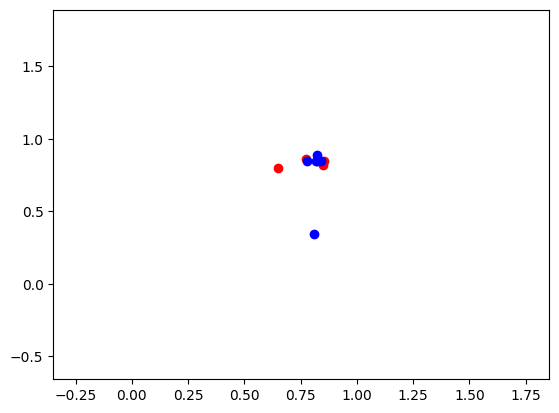

Bobot: [0.0, -3.2847654416651883e-06, -4.413231346163458e-09, -2.4337331983660974e-06]


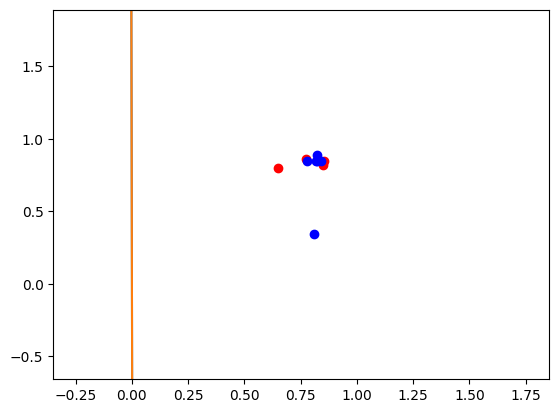

Bobot: [0.0001, 7.895842031773068e-05, 8.892372096805616e-05, 6.412173050179374e-05]


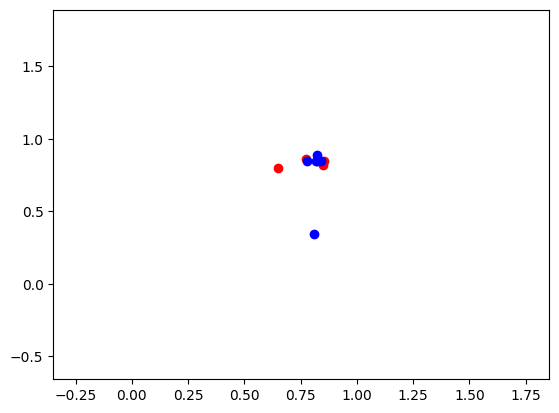

Bobot: [0.0, 1.3944999084411434e-05, 9.112010756681736e-06, 4.053802476252105e-06]


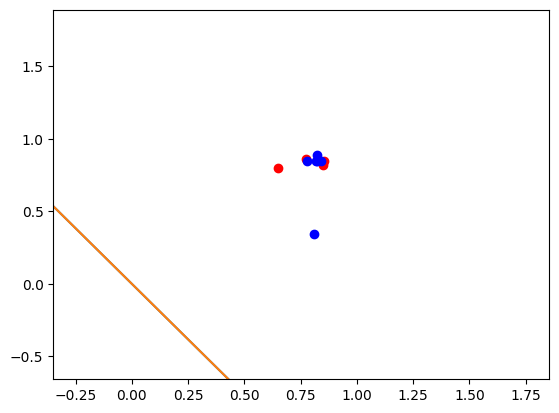

Bobot: [-0.0001, -6.341400471342704e-05, -7.681354461258958e-05, -6.760542018056378e-05]


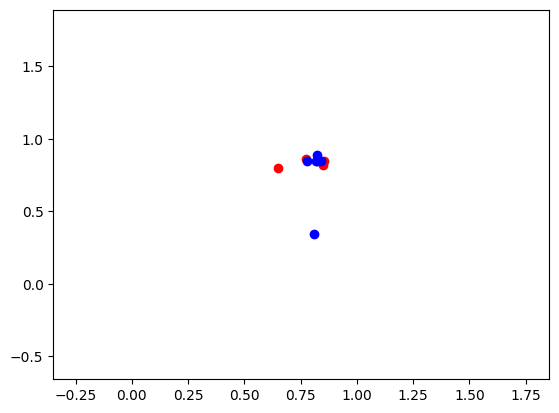

Bobot: [0.0, 1.454959048172287e-05, 7.797661003889326e-06, -1.1150955270207744e-06]


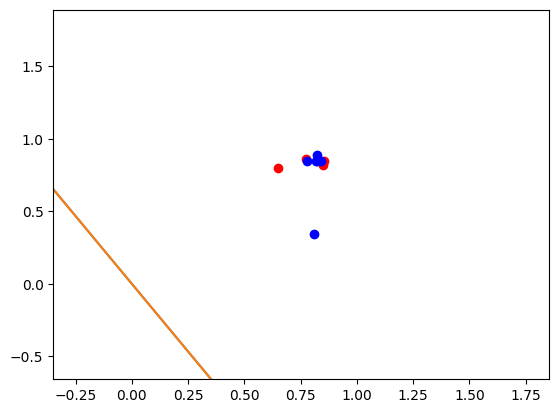


Epoch 2
Bobot: [-0.0001, -7.092662317455505e-05, -7.666904451376951e-05, -7.046017914633869e-05]


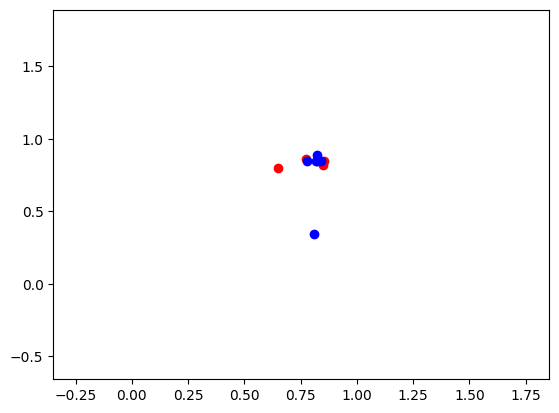

Bobot: [0.0, 1.1264825040057682e-05, 7.793247772543163e-06, -3.548828725386872e-06]


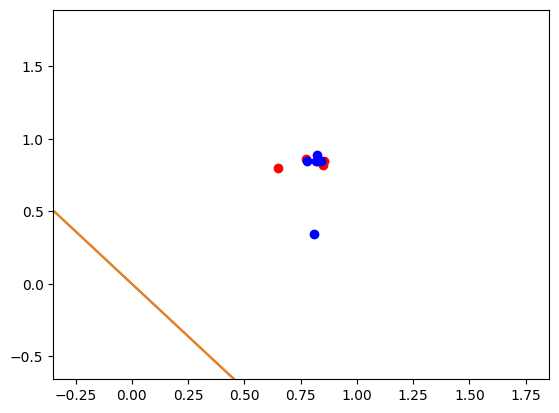

Bobot: [-0.0001, -7.36758202195595e-05, -7.402567571408504e-05, -6.887411271811519e-05]


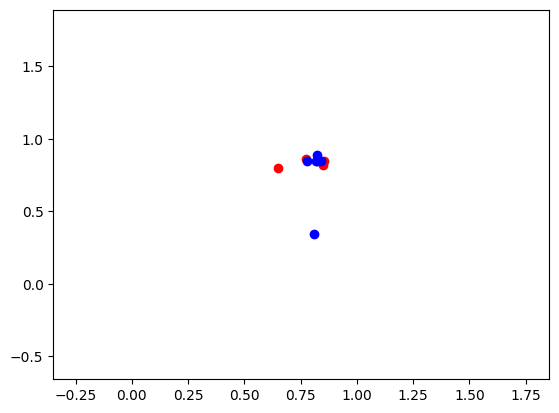

Bobot: [0.0, 8.56736553983637e-06, 1.4902458485317285e-05, -2.318649017955346e-06]


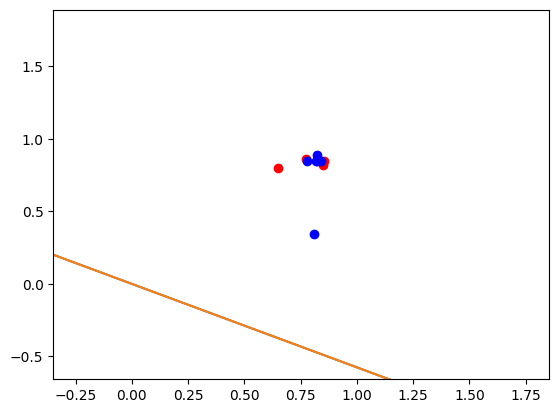

Bobot: [-0.0001, -5.6446055693482874e-05, -6.490925172605714e-05, -6.238657704349699e-05]


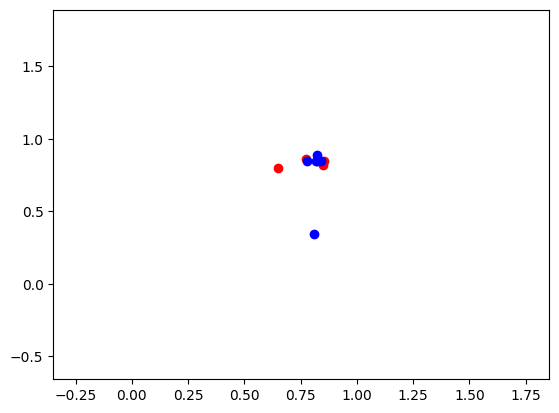

Bobot: [0.0, 2.1517539501667032e-05, 1.9701953890421763e-05, 4.1037476100460116e-06]


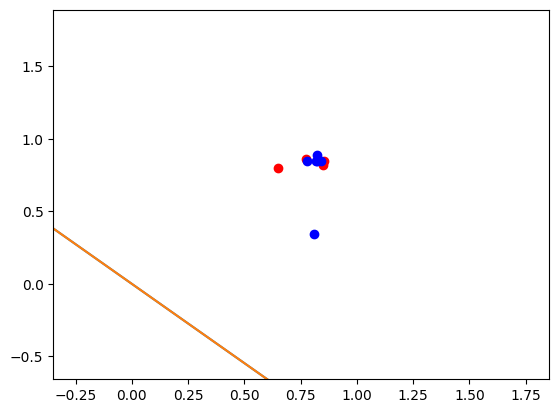


Epoch 3
Bobot: [-0.0001, -6.395867415461089e-05, -6.476475162723707e-05, -6.52413360092719e-05]


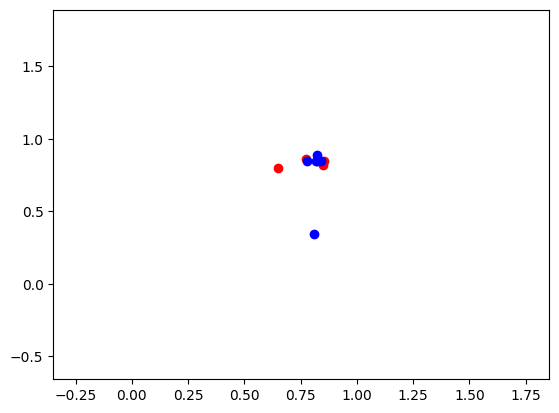

Bobot: [0.0, 1.8232774060001844e-05, 1.96975406590756e-05, 1.6700144116799142e-06]


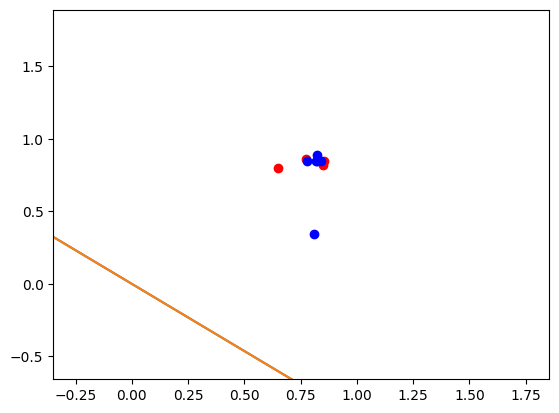

Bobot: [-0.0001, -6.670787119961533e-05, -6.21213828275526e-05, -6.36552695810484e-05]


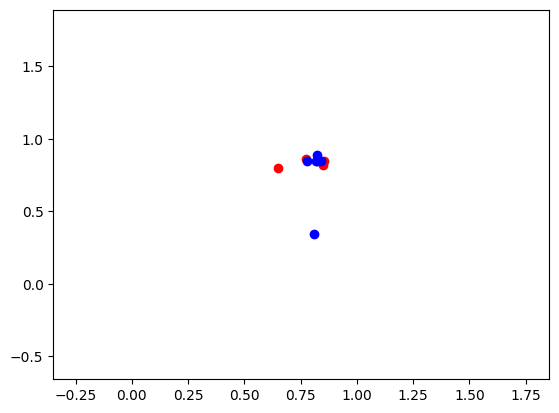

Bobot: [0.0, 1.5535314559780533e-05, 2.6806751371849722e-05, 2.90019411911144e-06]


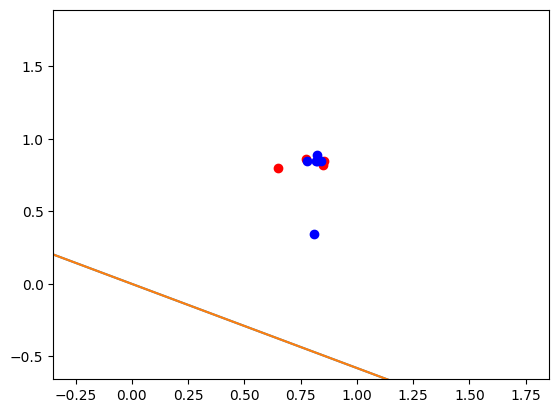

Bobot: [-0.0001, -4.947810667353871e-05, -5.30049588395247e-05, -5.71677339064302e-05]


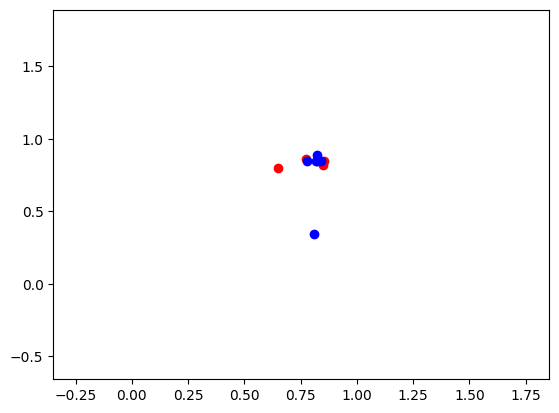

Bobot: [0.0, 2.8485488521611194e-05, 3.16062467769542e-05, 9.322590747112804e-06]


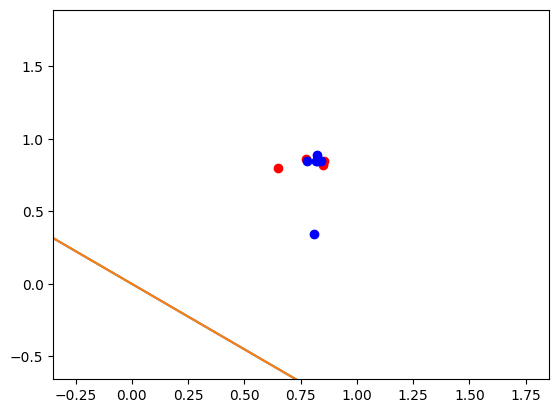


Epoch 4
Bobot: [-0.0001, -5.699072513466673e-05, -5.2860458740704635e-05, -6.002249287220511e-05]


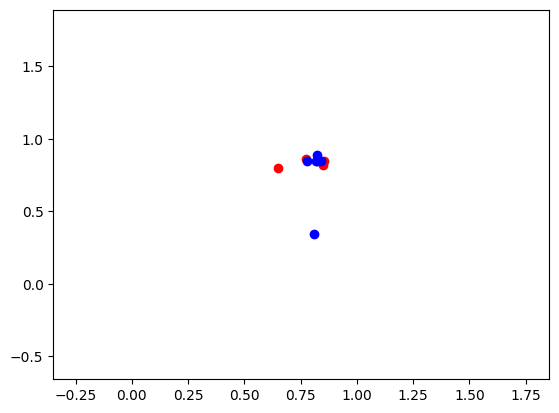

Bobot: [0.0, 2.5200723079946006e-05, 3.1601833545608036e-05, 6.888857548746707e-06]


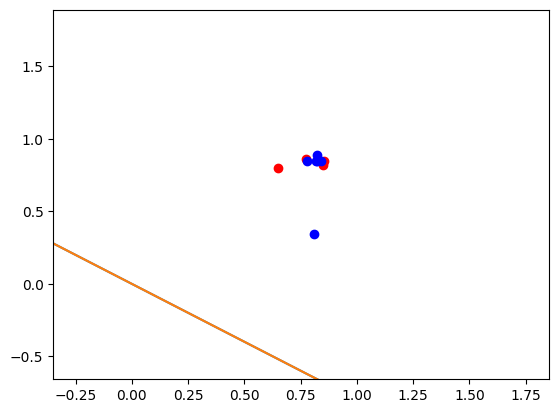

Bobot: [-0.0001, -5.973992217967117e-05, -5.0217089941020164e-05, -5.843642644398161e-05]


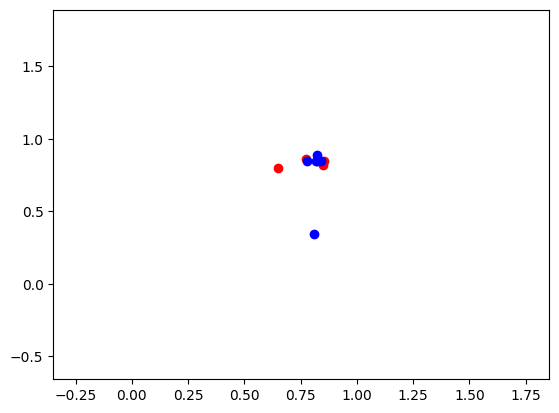

Bobot: [0.0, 2.2503263579724695e-05, 3.871104425838216e-05, 8.119037256178233e-06]


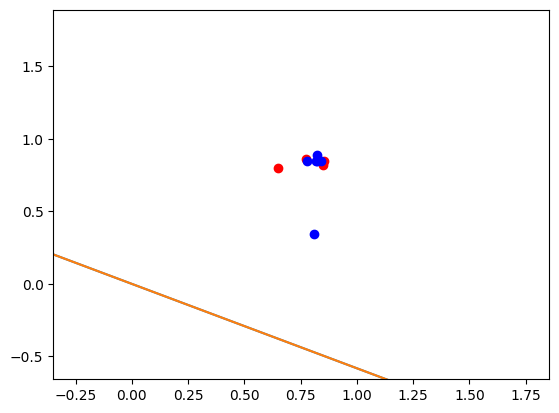

Bobot: [-0.0001, -4.251015765359455e-05, -4.1100665952992265e-05, -5.1948890769363407e-05]


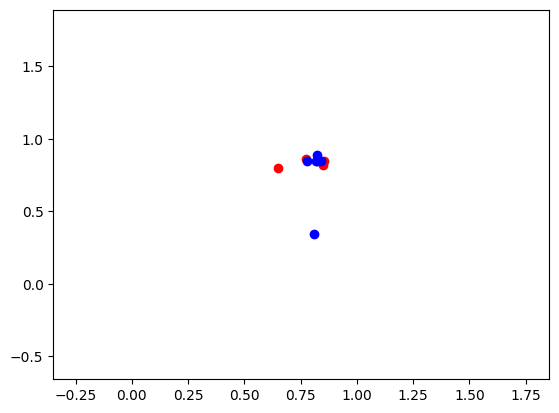

Bobot: [0.0, 3.5453437541555356e-05, 4.3510539663486636e-05, 1.4541433884179597e-05]


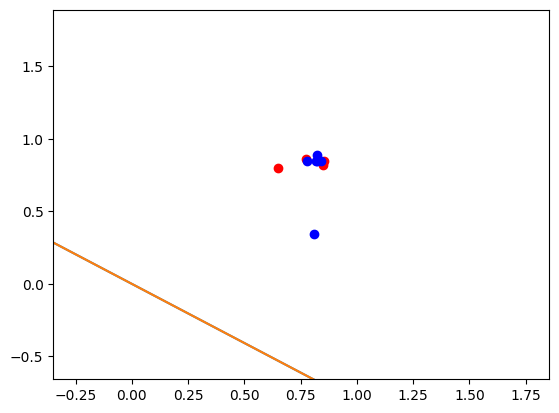


Epoch 5
Bobot: [-0.0001, -5.002277611472257e-05, -4.09561658541722e-05, -5.4803649735138315e-05]


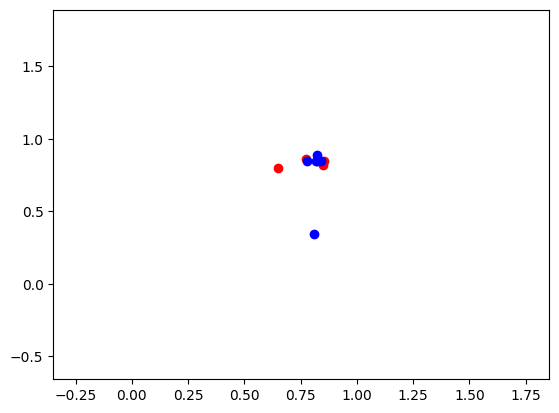

Bobot: [0.0, 3.216867209989017e-05, 4.350612643214047e-05, 1.21077006858135e-05]


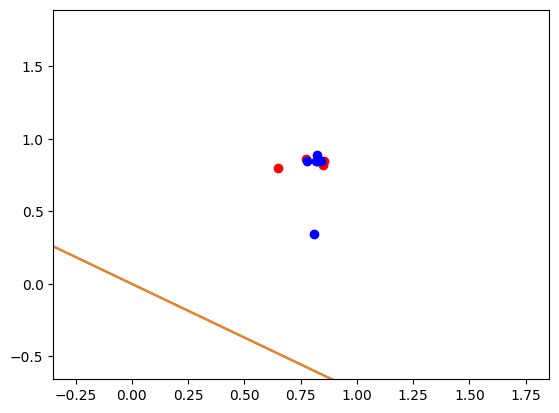

Bobot: [-0.0001, -5.277197315972701e-05, -3.831279705448773e-05, -5.3217583306914816e-05]


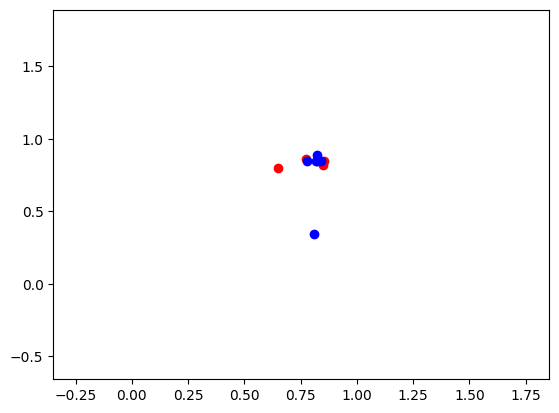

Bobot: [0.0, 2.9471212599668857e-05, 5.0615337144914595e-05, 1.3337880393245026e-05]


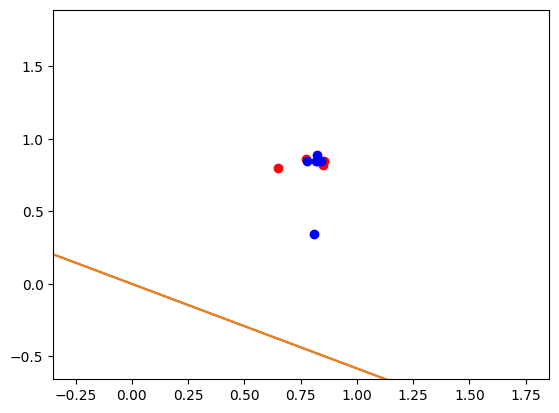

Bobot: [-0.0001, -3.554220863365039e-05, -2.9196373066459828e-05, -4.6730047632296614e-05]


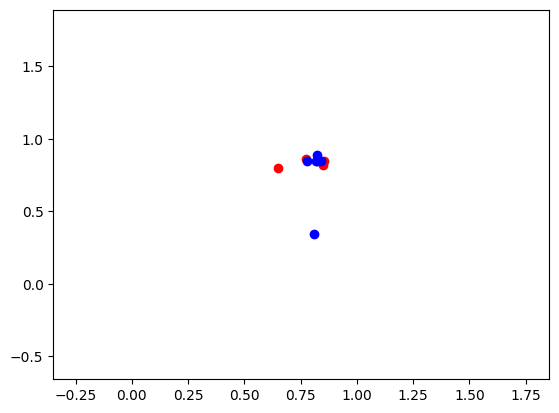

Bobot: [0.0, 4.242138656149952e-05, 5.541483255001907e-05, 1.976027702124639e-05]


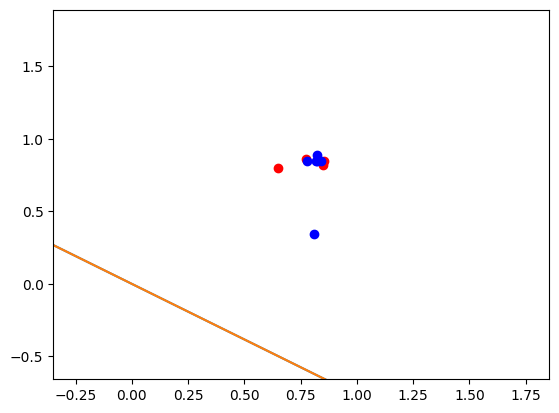


Epoch 6
Bobot: [-0.0001, -4.3054827094778406e-05, -2.9051872967639762e-05, -4.958480659807152e-05]


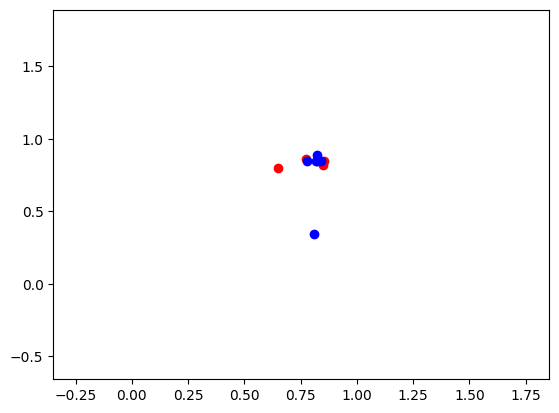

Bobot: [0.0, 3.913662111983433e-05, 5.541041931867291e-05, 1.7326543822880293e-05]


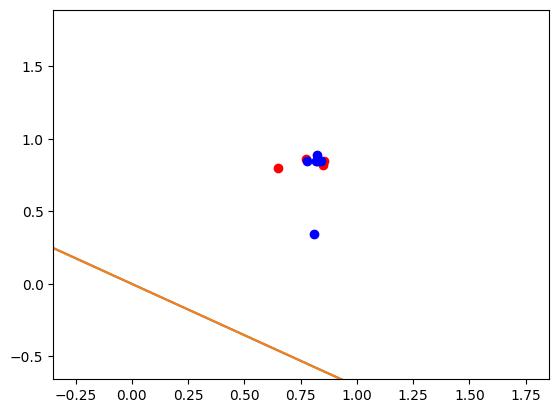

Bobot: [-0.0001, -4.580402413978285e-05, -2.640850416795529e-05, -4.7998740169848024e-05]


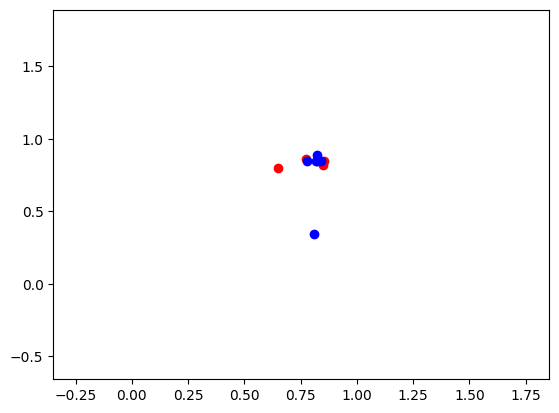

Bobot: [0.0, 3.643916161961302e-05, 6.251963003144703e-05, 1.855672353031182e-05]


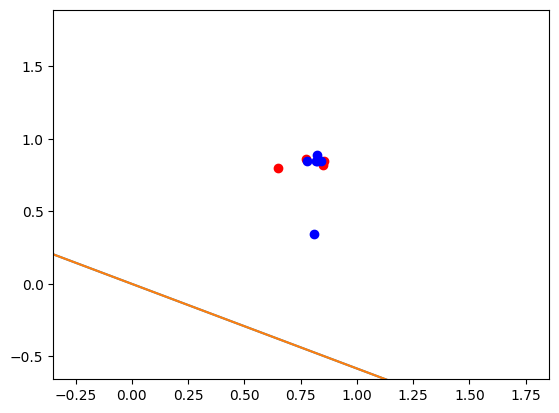

Bobot: [-0.0001, -2.8574259613706226e-05, -1.729208017992739e-05, -4.151120449522982e-05]


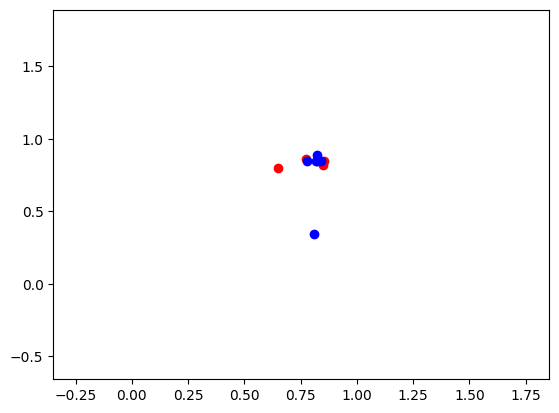

Bobot: [0.0, 4.938933558144368e-05, 6.731912543655151e-05, 2.4979120158313183e-05]


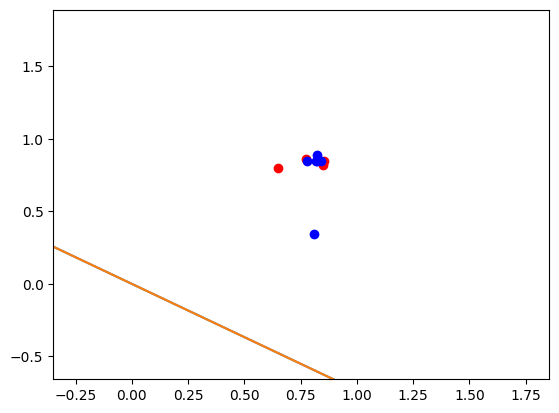


Epoch 7
Bobot: [-0.0001, -3.6086878074834244e-05, -1.7147580081107325e-05, -4.436596346100473e-05]


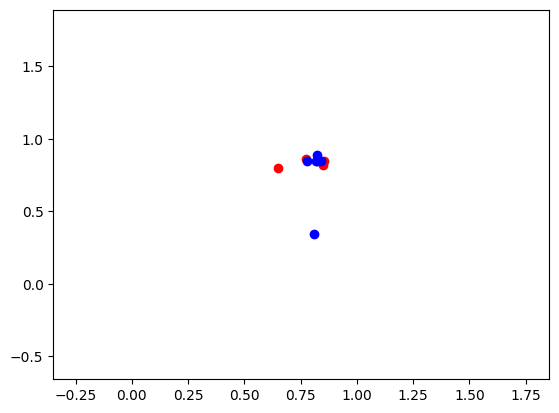

Bobot: [0.0, 4.610457013977849e-05, 6.731471220520535e-05, 2.2545386959947085e-05]


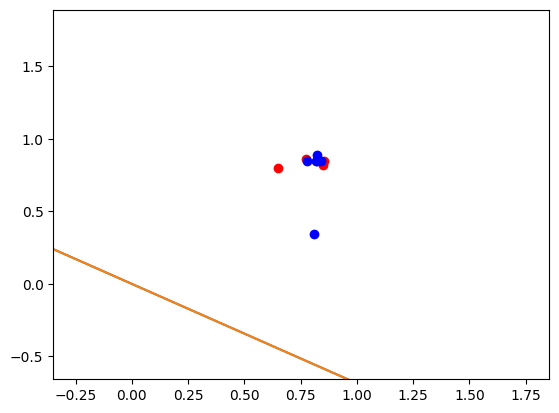

Bobot: [-0.0001, -3.8836075119838686e-05, -1.4504211281422854e-05, -4.277989703278123e-05]


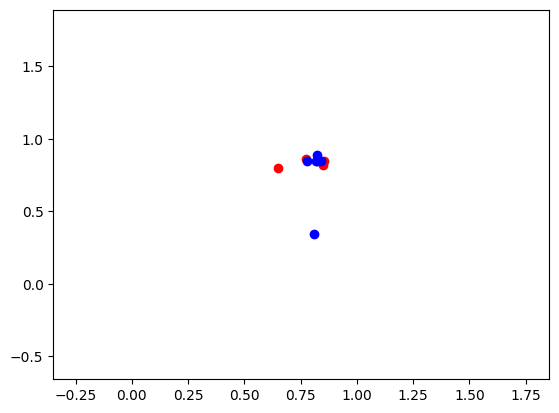

Bobot: [0.0, 4.340711063955718e-05, 7.442392291797947e-05, 2.377556666737861e-05]


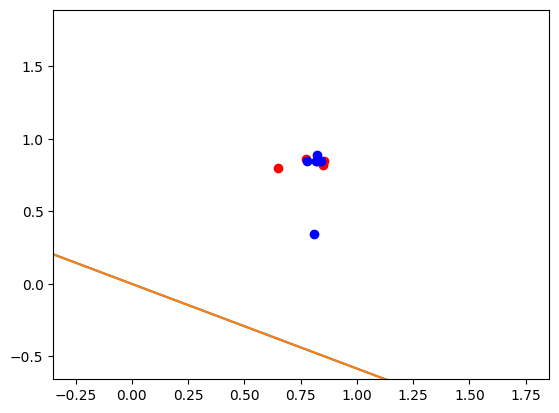

Bobot: [-0.0001, -2.1606310593762064e-05, -5.387787293394954e-06, -3.629236135816303e-05]


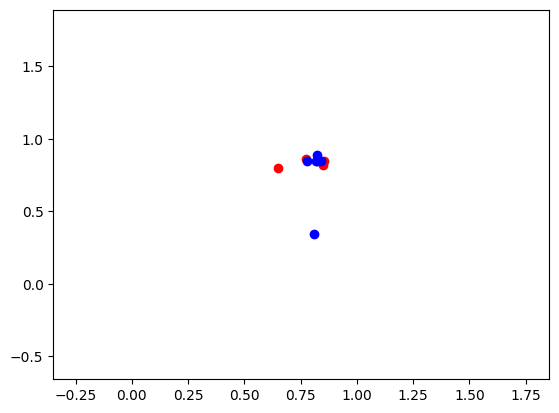

Bobot: [0.0, 5.635728460138784e-05, 7.922341832308395e-05, 3.0197963295379976e-05]


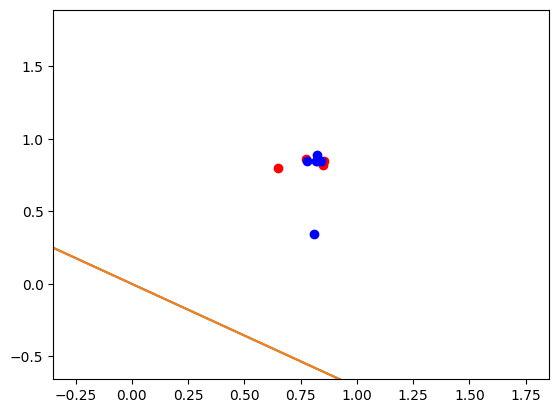


Epoch 8
Bobot: [-0.0001, -2.9118929054890082e-05, -5.243287194574888e-06, -3.914712032393794e-05]


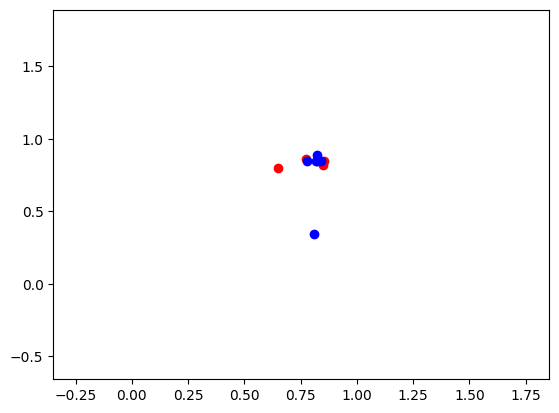

Bobot: [0.0, 5.3072519159722654e-05, 7.921900509173778e-05, 2.7764230097013878e-05]


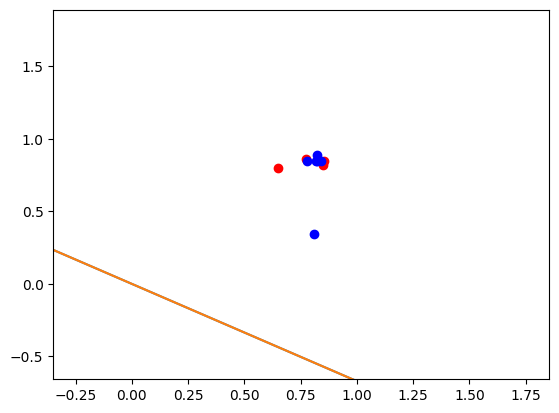

Bobot: [-0.0001, -3.1868126099894524e-05, -2.599918394890417e-06, -3.756105389571444e-05]


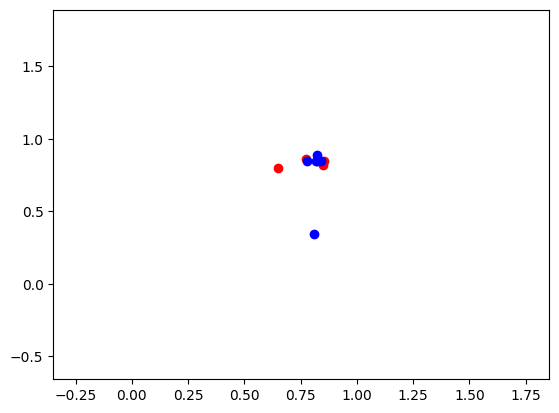

Bobot: [0.0, 5.037505965950134e-05, 8.63282158045119e-05, 2.8994409804445404e-05]


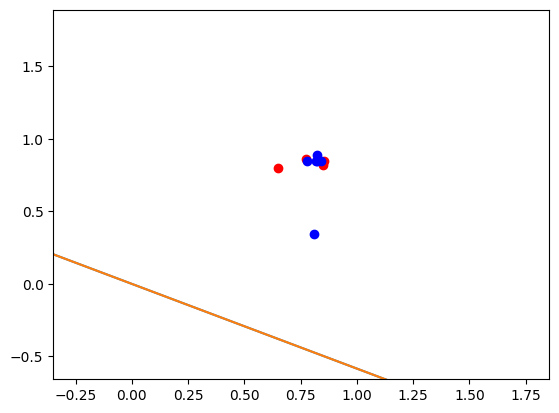

Bobot: [-0.0001, -1.4638361573817902e-05, 6.516505593137482e-06, -3.1073518221096235e-05]


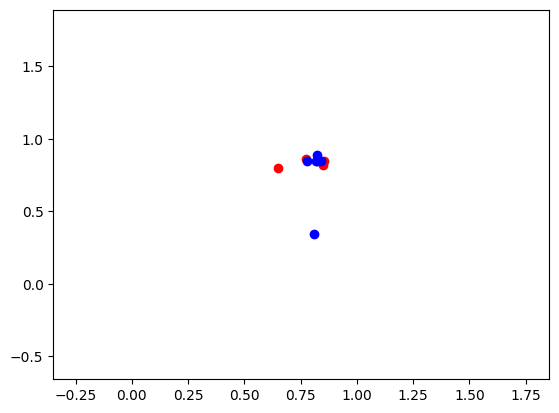

Bobot: [0.0, 6.3325233621332e-05, 9.112771120961638e-05, 3.541680643244677e-05]


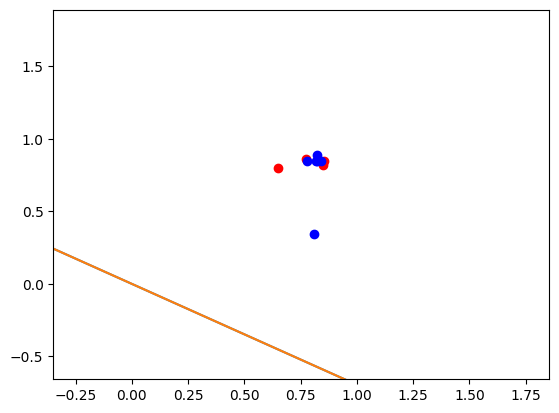


Epoch 9
Bobot: [-0.0001, -2.215098003494592e-05, 6.6610056919575486e-06, -3.3928277186871144e-05]


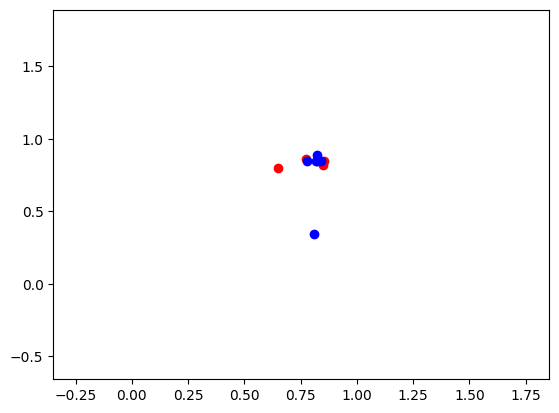

Bobot: [0.0, 6.0040468179666816e-05, 9.112329797827022e-05, 3.298307323408067e-05]


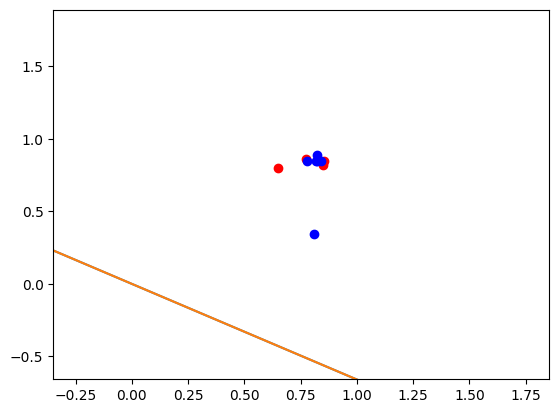

Bobot: [-0.0001, -2.4900177079950362e-05, 9.30437449164202e-06, -3.2342210758647645e-05]


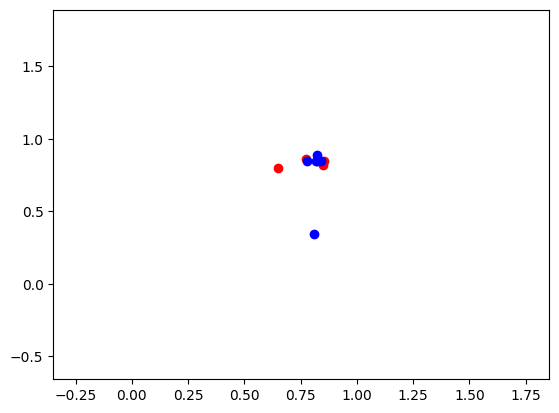

Bobot: [0.0, 5.7343008679445505e-05, 9.823250869104434e-05, 3.42132529415122e-05]


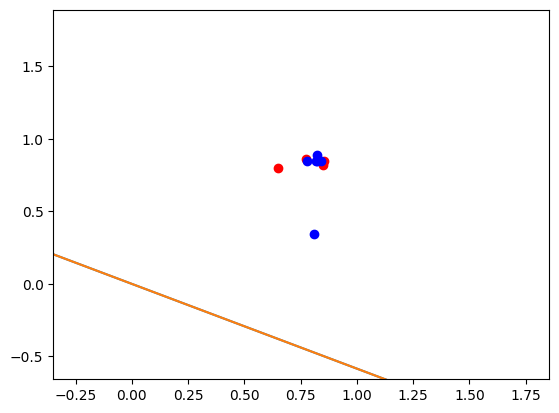

Bobot: [-0.0001, -7.67041255387374e-06, 1.842079847966992e-05, -2.5854675084029443e-05]


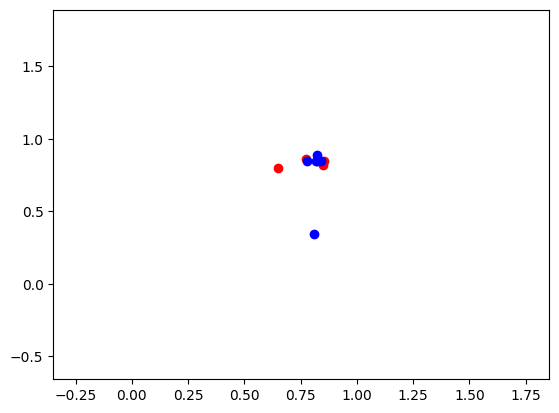

Bobot: [0.0, 7.029318264127617e-05, 0.00010303200409614882, 4.063564956951356e-05]


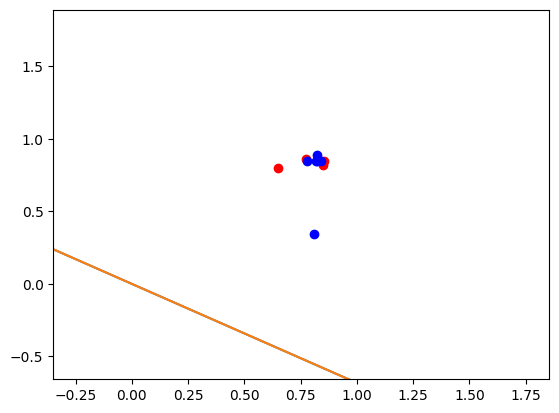


Epoch 10
Bobot: [-0.0001, -1.5183031015001758e-05, 1.8565298578489985e-05, -2.870943404980435e-05]


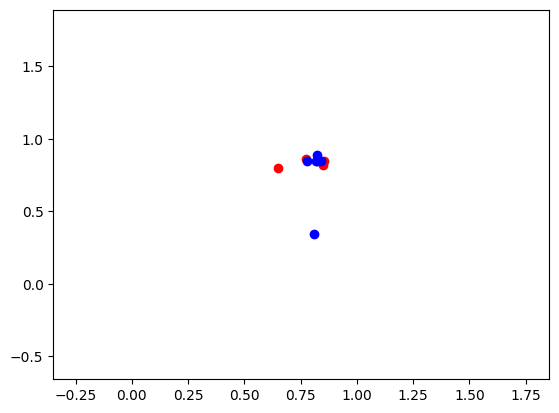

Bobot: [0.0, 6.700841719961098e-05, 0.00010302759086480266, 3.8201916371147464e-05]


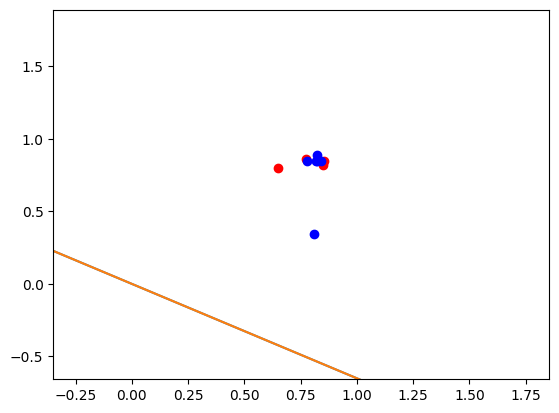

Bobot: [-0.0001, -1.79322280600062e-05, 2.1208667378174457e-05, -2.7123367621580852e-05]


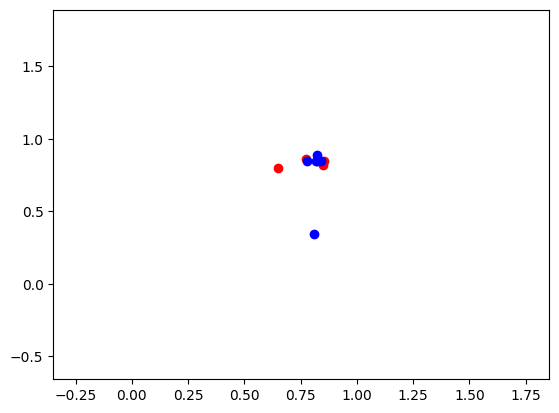

Bobot: [0.0, 6.431095769938967e-05, 0.00011013680157757678, 3.943209607857899e-05]


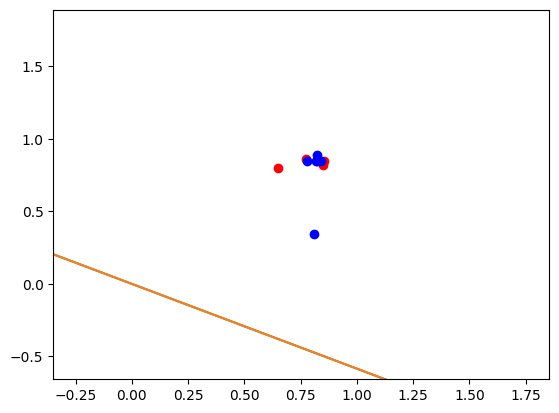

Bobot: [-0.0001, -7.024635339295774e-07, 3.0325091366202356e-05, -2.063583194696265e-05]


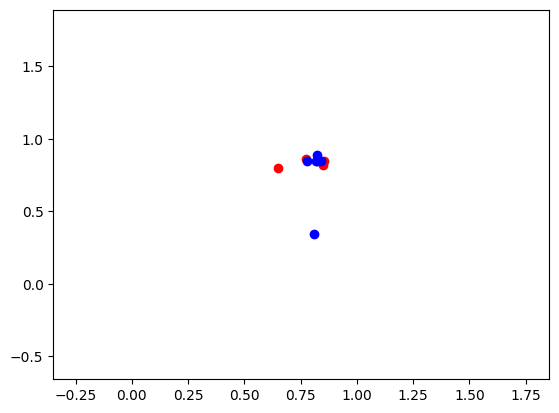

Bobot: [0.0, 7.726113166122033e-05, 0.00011493629698268126, 4.5854492706580354e-05]


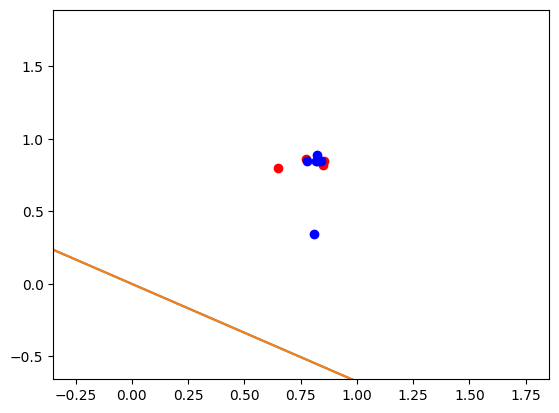

Epochs: 10
Accuracy: 0.5657894736842105


In [27]:
w, epoch = percep_fit(X_train, y_train, a=0.0001 , verbose=True, draw=True) ## Masukkan nilai learning rate sebesar 0.0001
out = percep_predict(X_test, w)
accuracy = calc_accuracy(out, y_test)

print('Epochs:', epoch)
print('Accuracy:', accuracy)


Epoch 1
Bobot: [-1.0, -0.8547621365627792, -0.8446670551765882, -0.693450836193179]


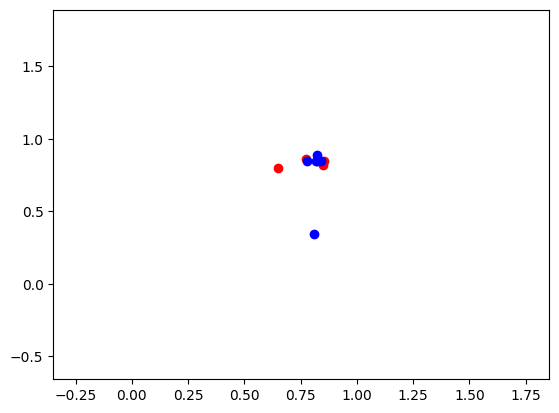

Bobot: [0.0, -0.03284765441665194, -4.413231346156454e-05, -0.024337331983660948]


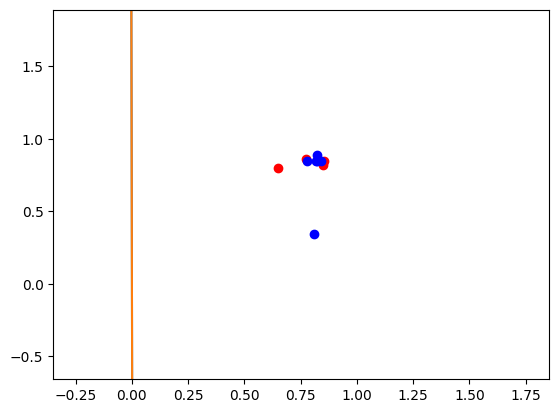

Bobot: [1.0, 0.7895842031773067, 0.8892372096805616, 0.6412173050179374]


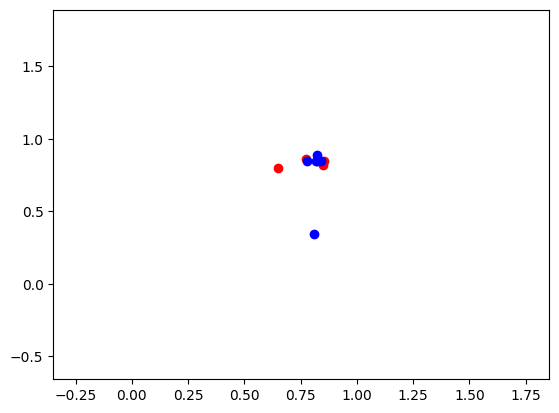

Bobot: [0.0, 0.13944999084411436, 0.09112010756681743, 0.040538024762521]


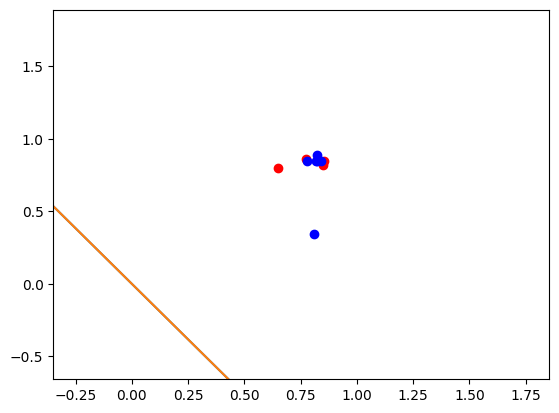

Bobot: [-1.0, -0.6341400471342703, -0.7681354461258956, -0.6760542018056377]


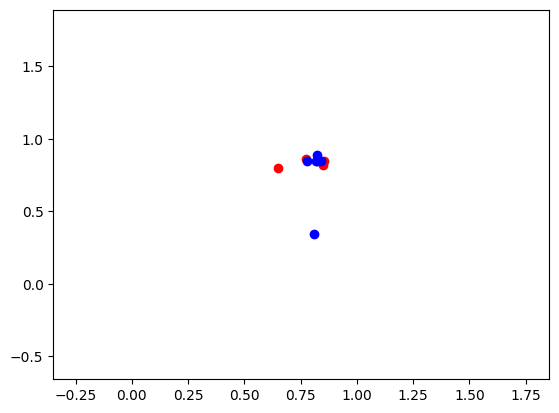

Bobot: [0.0, 0.14549590481722874, 0.07797661003889345, -0.011150955270207707]


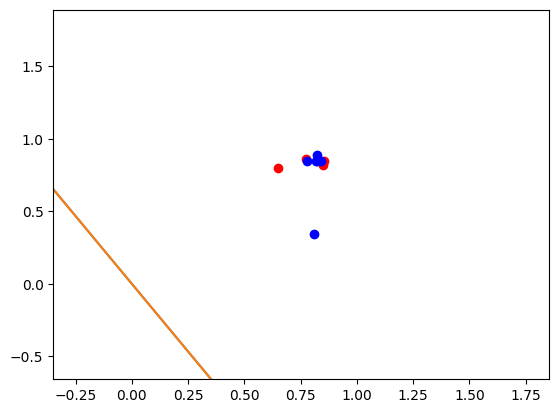


Epoch 2
Bobot: [-1.0, -0.7092662317455505, -0.7666904451376948, -0.7046017914633868]


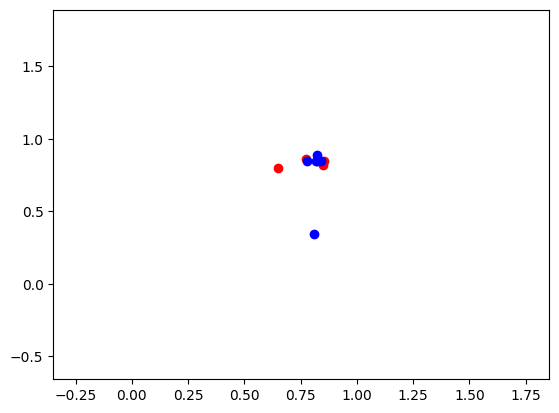

Bobot: [0.0, 0.1126482504005768, 0.07793247772543188, -0.035488287253868656]


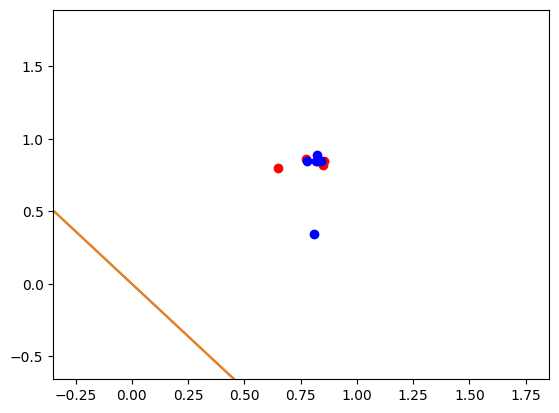

Bobot: [-1.0, -0.736758202195595, -0.74025675714085, -0.6887411271811518]


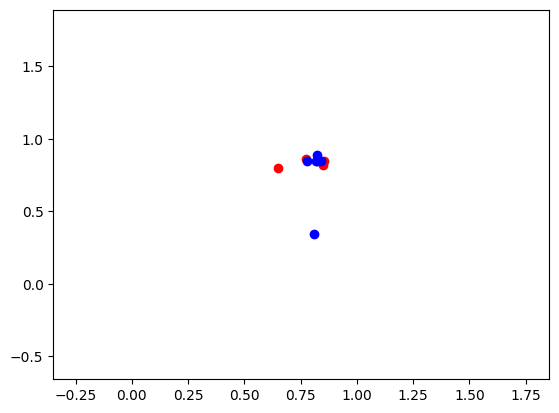

Bobot: [0.0, 0.08567365539836369, 0.14902458485317316, -0.02318649017955343]


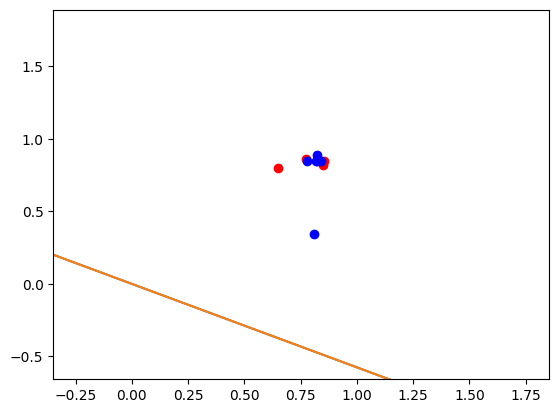

Bobot: [-1.0, -0.5644605569348287, -0.649092517260571, -0.6238657704349698]


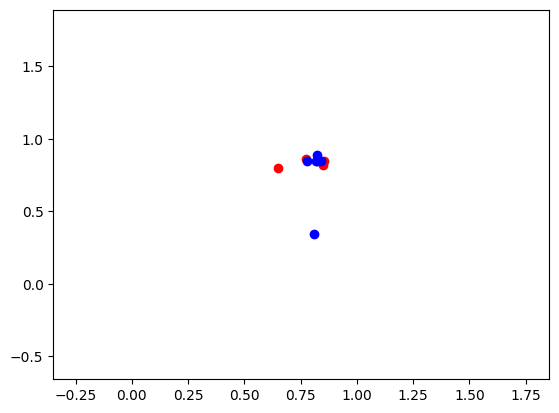

Bobot: [0.0, 0.21517539501667038, 0.19701953890421797, 0.04103747610046016]


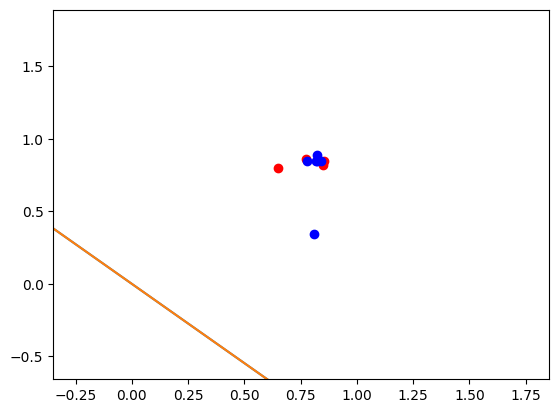


Epoch 3
Bobot: [-1.0, -0.6395867415461088, -0.6476475162723703, -0.6524133600927189]


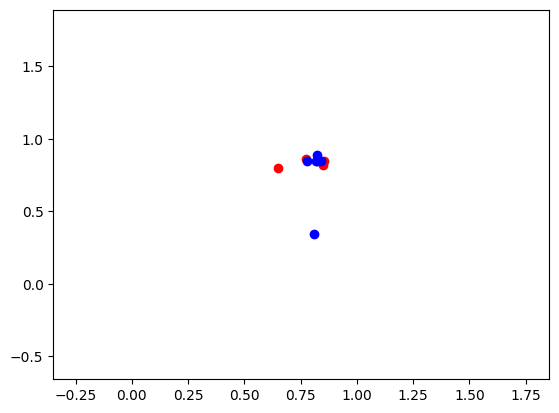

Bobot: [0.0, 0.18232774060001844, 0.1969754065907564, 0.01670014411679921]


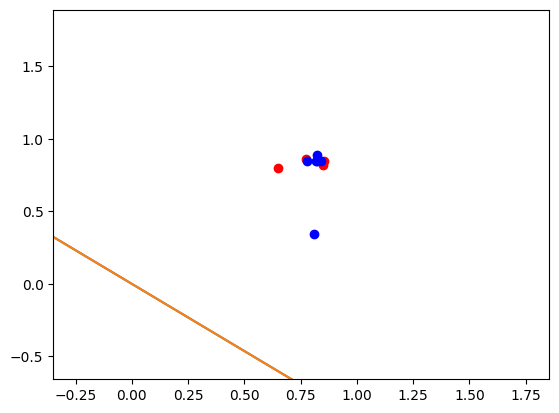

Bobot: [-1.0, -0.6670787119961533, -0.6212138282755255, -0.6365526958104839]


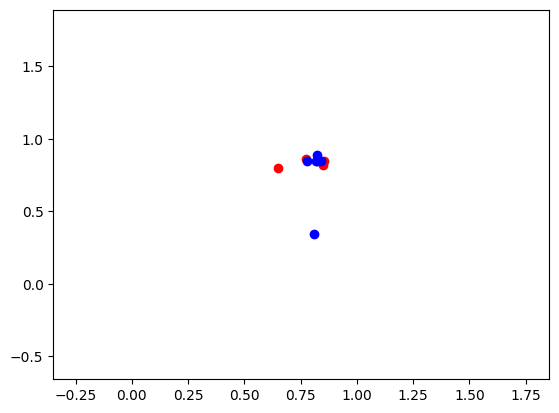

Bobot: [0.0, 0.15535314559780533, 0.2680675137184977, 0.029001941191114433]


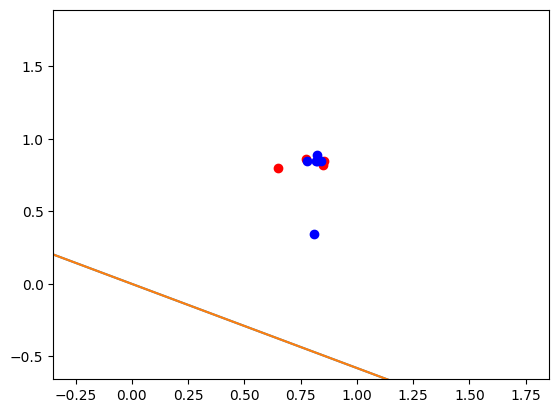

Bobot: [-1.0, -0.494781066735387, -0.5300495883952465, -0.571677339064302]


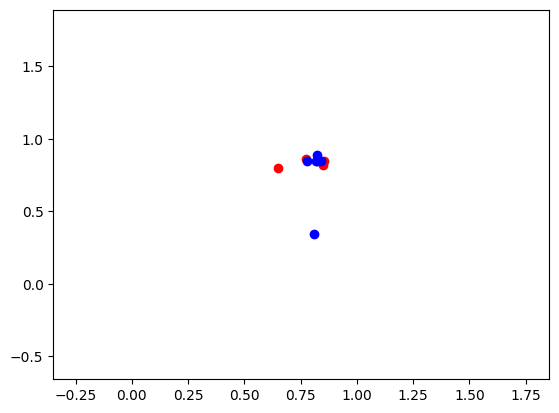

Bobot: [0.0, 0.284854885216112, 0.3160624677695425, 0.09322590747112802]


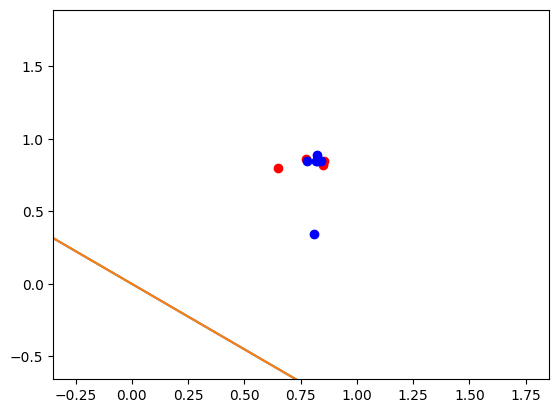


Epoch 4
Bobot: [-1.0, -0.5699072513466672, -0.5286045874070457, -0.600224928722051]


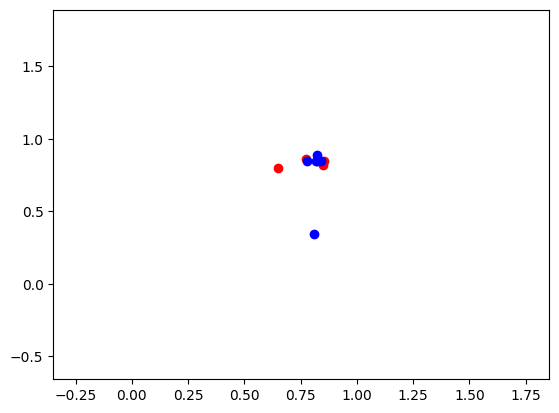

Bobot: [0.0, 0.2520072307994601, 0.31601833545608093, 0.06888857548746707]


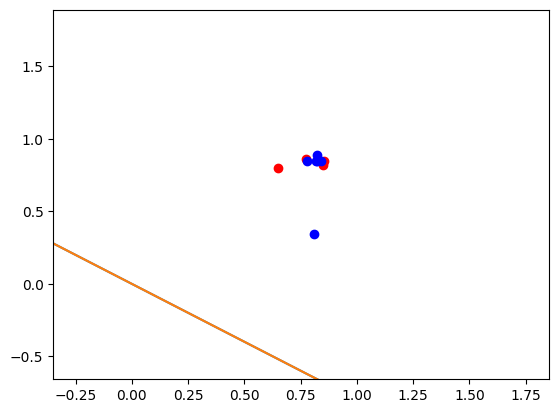

Bobot: [-1.0, -0.5973992217967117, -0.502170899410201, -0.584364264439816]


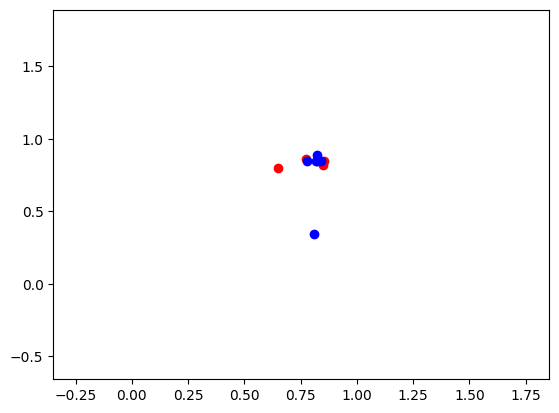

Bobot: [0.0, 0.22503263579724697, 0.3871104425838222, 0.0811903725617823]


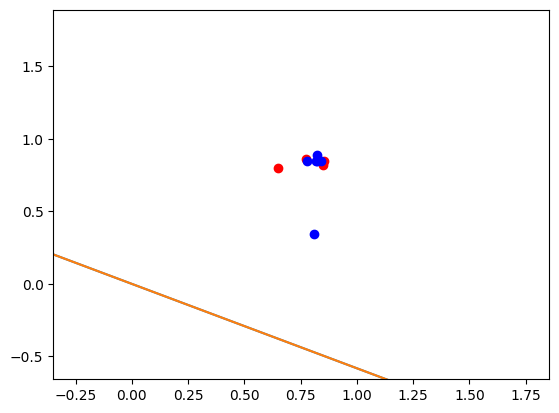

Bobot: [-1.0, -0.4251015765359454, -0.411006659529922, -0.5194889076936341]


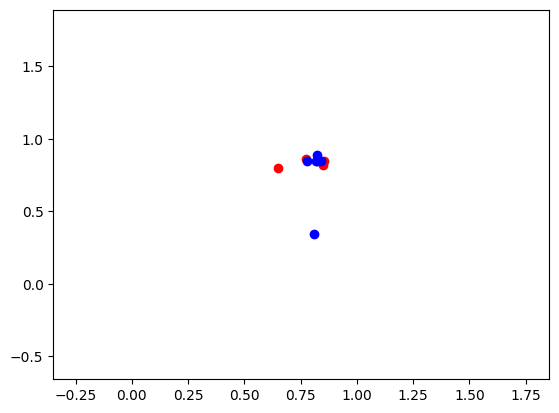

Bobot: [0.0, 0.35453437541555366, 0.435105396634867, 0.1454143388417959]


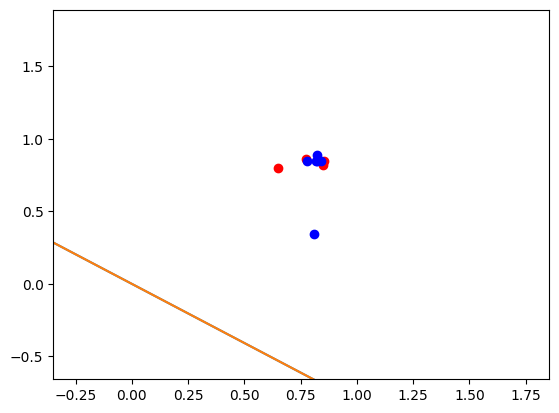


Epoch 5
Bobot: [-1.0, -0.5002277611472256, -0.4095616585417212, -0.5480364973513832]


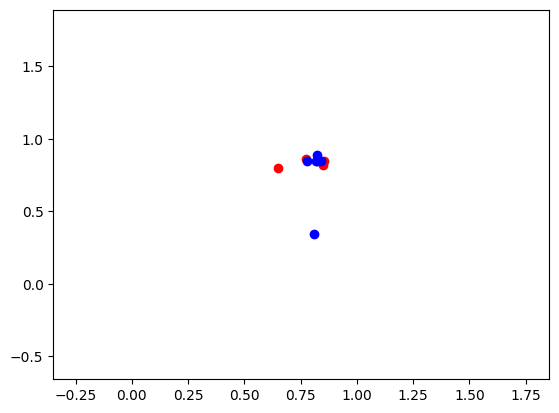

Bobot: [0.0, 0.3216867209989017, 0.43506126432140546, 0.12107700685813494]


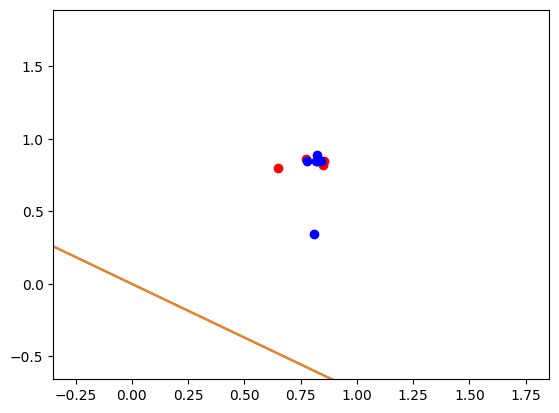

Bobot: [-1.0, -0.52771973159727, -0.38312797054487646, -0.5321758330691482]


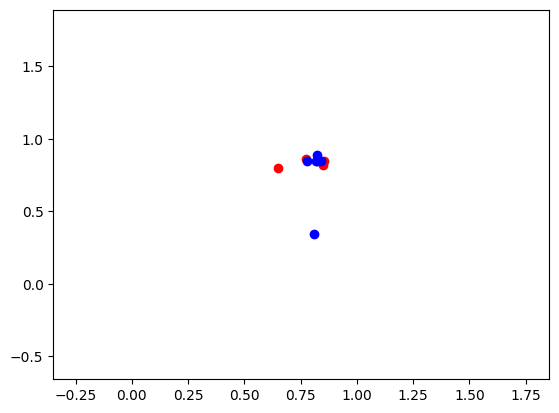

Bobot: [0.0, 0.2947121259966886, 0.5061533714491467, 0.13337880393245016]


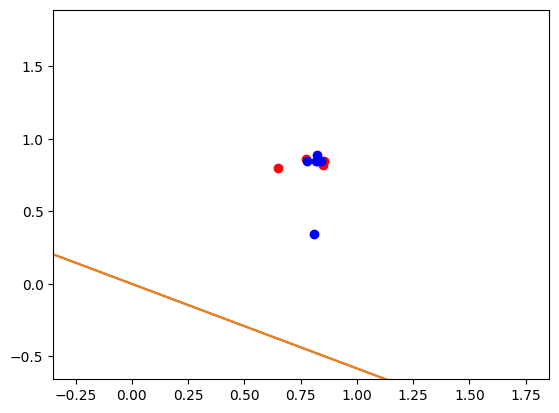

Bobot: [-1.0, -0.35542208633650374, -0.29196373066459747, -0.46730047632296623]


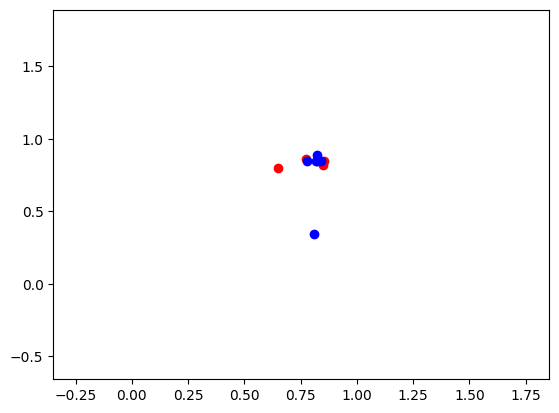

Bobot: [0.0, 0.4242138656149953, 0.5541483255001916, 0.19760277021246375]


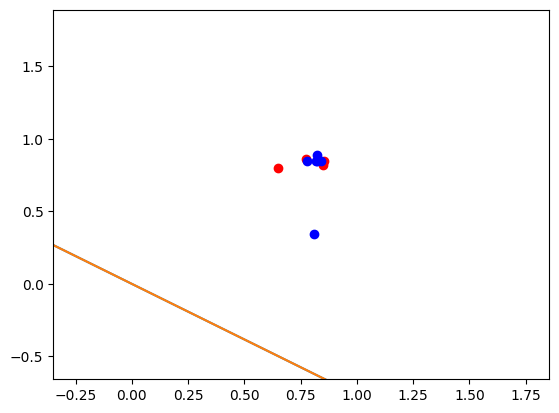


Epoch 6
Bobot: [-1.0, -0.4305482709477839, -0.2905187296763967, -0.4958480659807153]


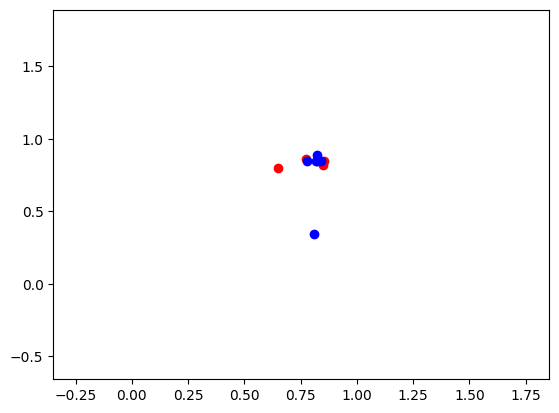

Bobot: [0.0, 0.39136621119834336, 0.55410419318673, 0.1732654382288028]


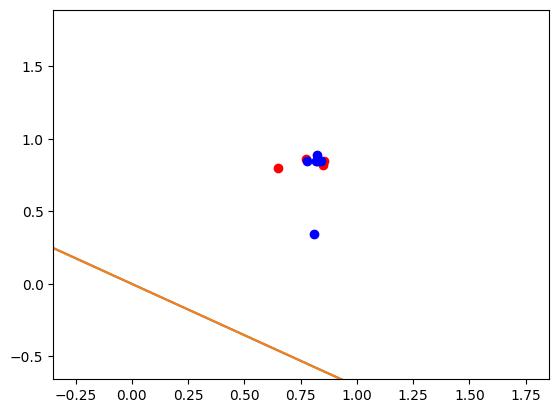

Bobot: [-1.0, -0.4580402413978284, -0.26408504167955194, -0.4799874016984803]


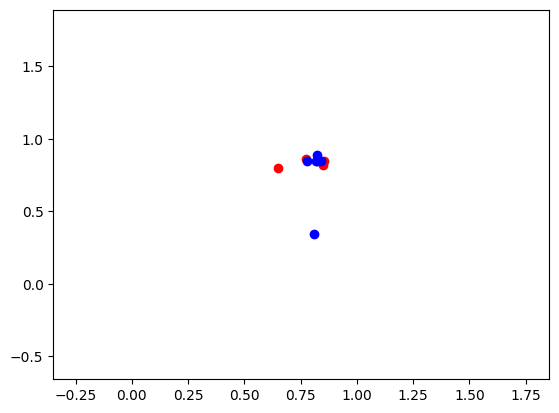

Bobot: [0.0, 0.36439161619613025, 0.6251963003144713, 0.18556723530311803]


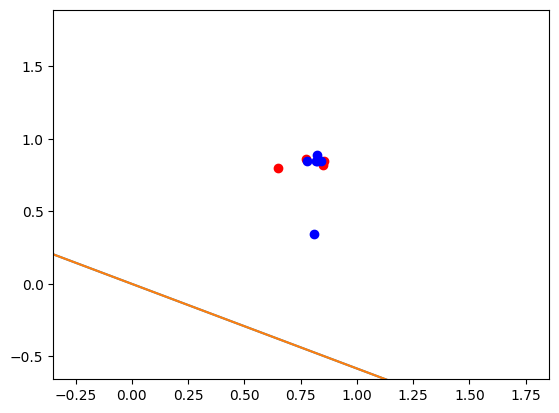

Bobot: [-1.0, -0.2857425961370621, -0.17292080179927294, -0.41511204495229836]


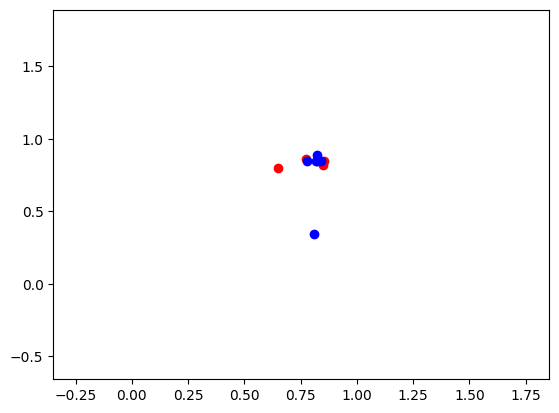

Bobot: [0.0, 0.49389335581443694, 0.6731912543655161, 0.24979120158313162]


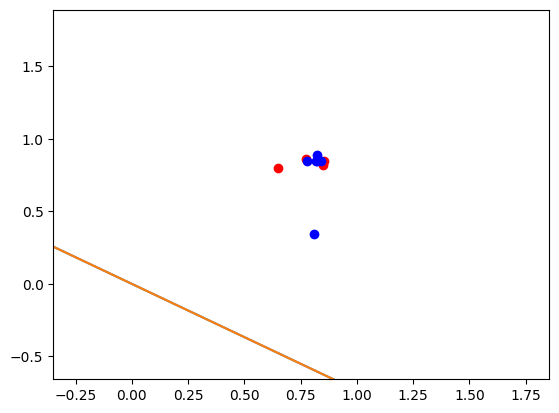


Epoch 7
Bobot: [-1.0, -0.3608687807483423, -0.17147580081107217, -0.4436596346100474]


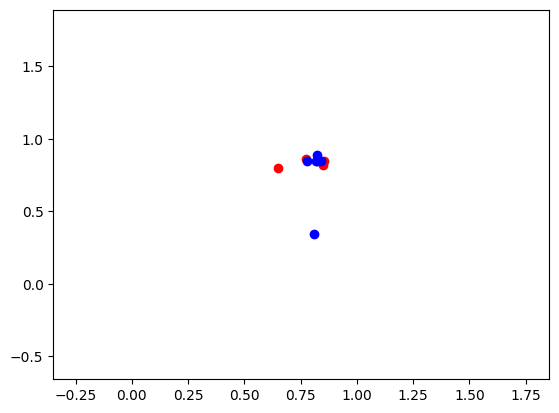

Bobot: [0.0, 0.461045701397785, 0.6731471220520545, 0.22545386959947067]


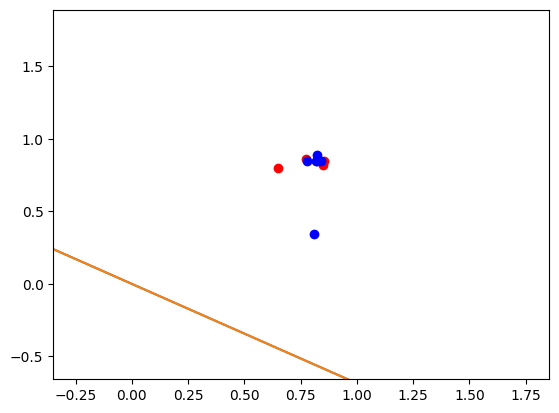

Bobot: [-1.0, -0.38836075119838676, -0.1450421128142274, -0.42779897032781244]


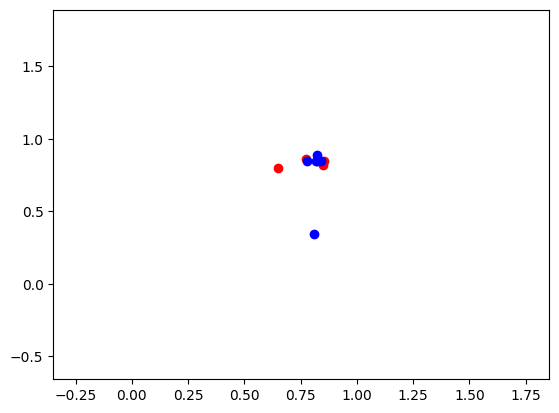

Bobot: [0.0, 0.4340711063955719, 0.7442392291797958, 0.2377556666737859]


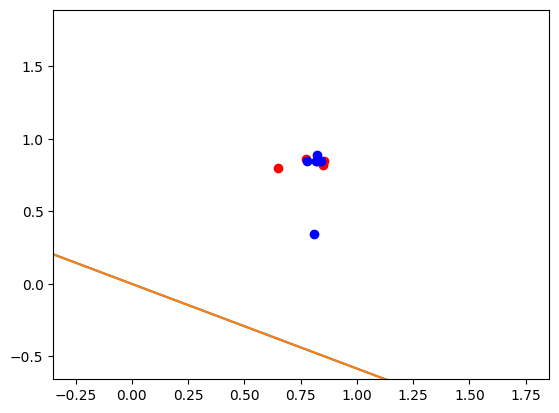

Bobot: [-1.0, -0.21606310593762046, -0.05387787293394841, -0.3629236135816305]


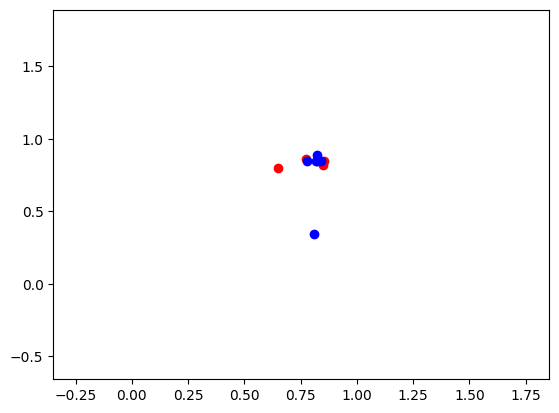

Bobot: [0.0, 0.5635728460138786, 0.7922341832308406, 0.3019796329537995]


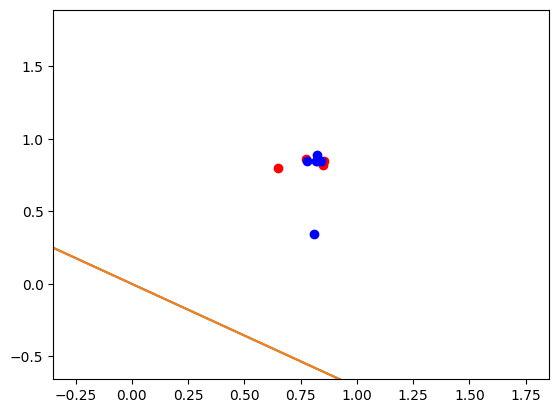


Epoch 8
Bobot: [-1.0, -0.29118929054890064, -0.05243287194574764, -0.39147120323937956]


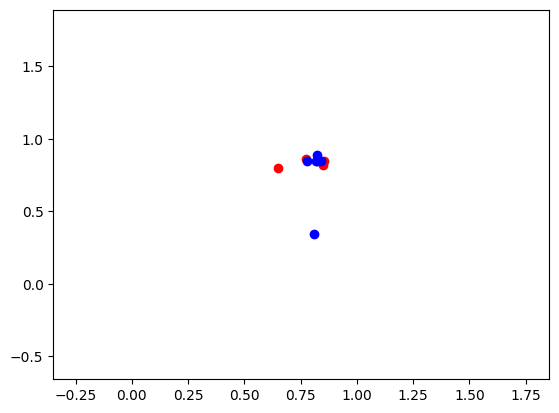

Bobot: [0.0, 0.5307251915972266, 0.792190050917379, 0.27764230097013853]


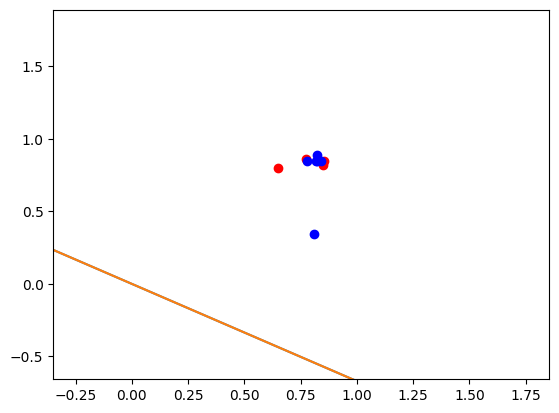

Bobot: [-1.0, -0.3186812609989451, -0.025999183948902882, -0.3756105389571446]


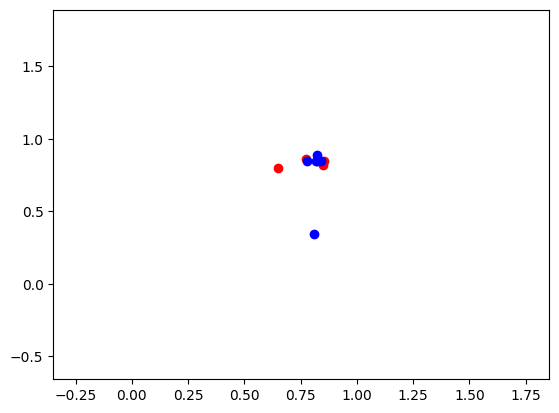

Bobot: [0.0, 0.5037505965950135, 0.8632821580451203, 0.28994409804445376]


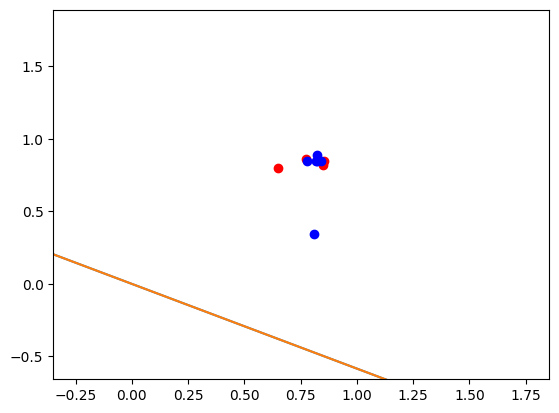

Bobot: [-1.0, -0.14638361573817882, 0.06516505593137611, -0.31073518221096263]


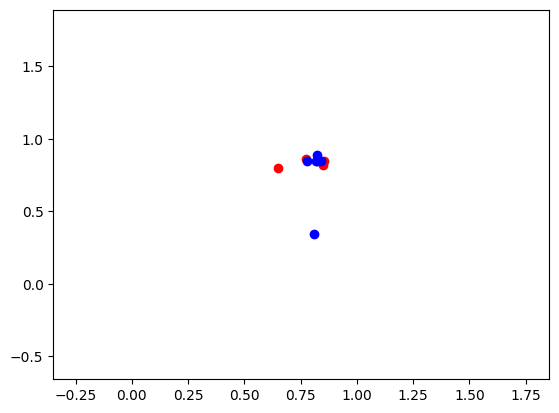

Bobot: [0.0, 0.6332523362133202, 0.9112771120961651, 0.35416806432446735]


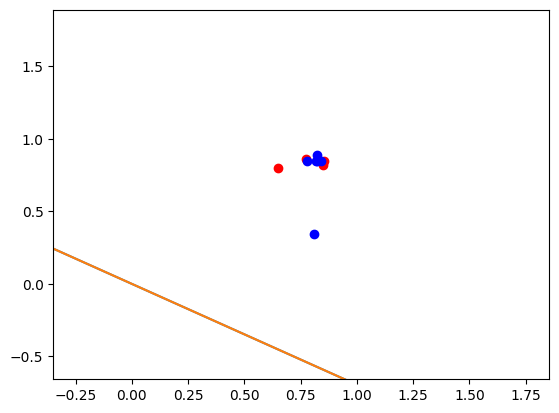


Epoch 9
Bobot: [-1.0, -0.221509800349459, 0.06661005691957689, -0.3392827718687117]


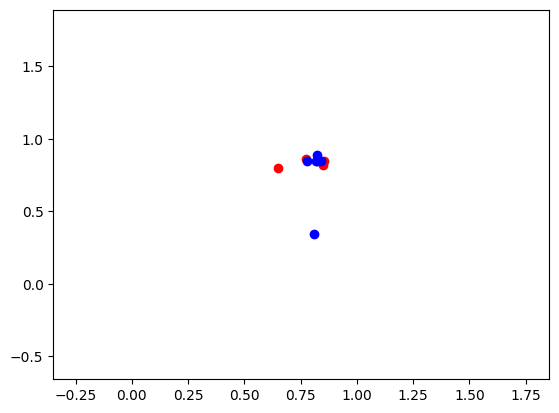

Bobot: [0.0, 0.6004046817966683, 0.9112329797827036, 0.3298307323408064]


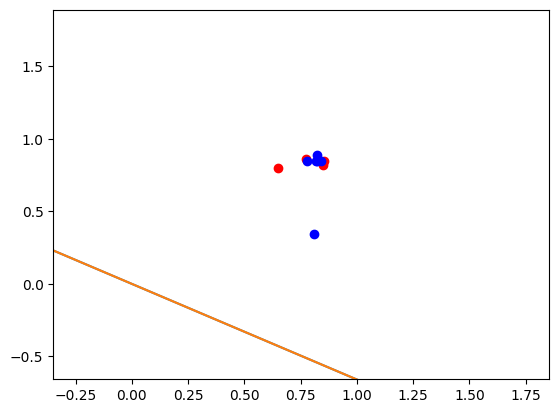

Bobot: [-1.0, -0.24900177079950347, 0.09304374491642164, -0.3234221075864767]


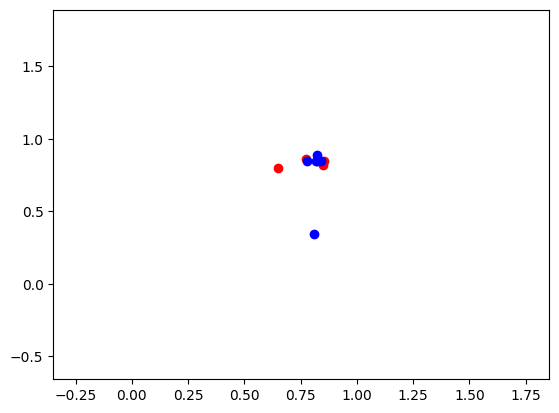

Bobot: [0.0, 0.5734300867944552, 0.9823250869104448, 0.3421325294151216]


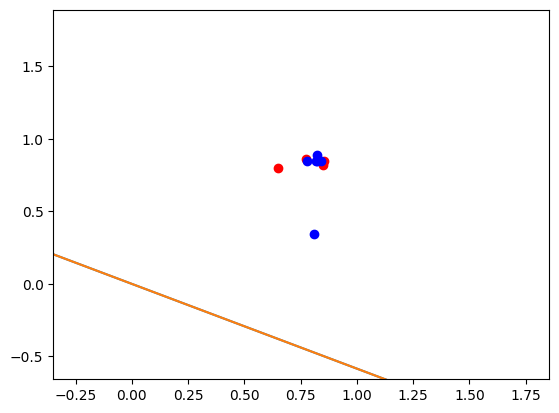

Bobot: [-1.0, -0.07670412553873718, 0.18420798479670064, -0.25854675084029477]


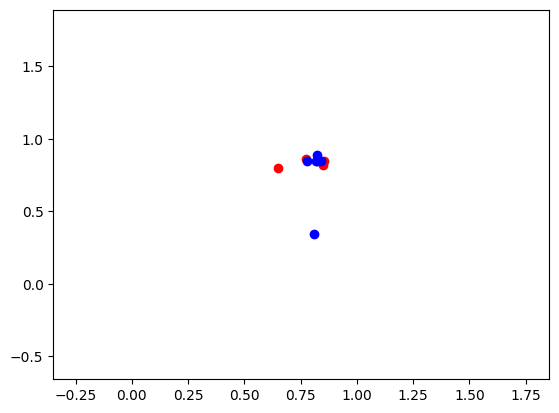

Bobot: [0.0, 0.7029318264127619, 1.0303200409614897, 0.4063564956951352]


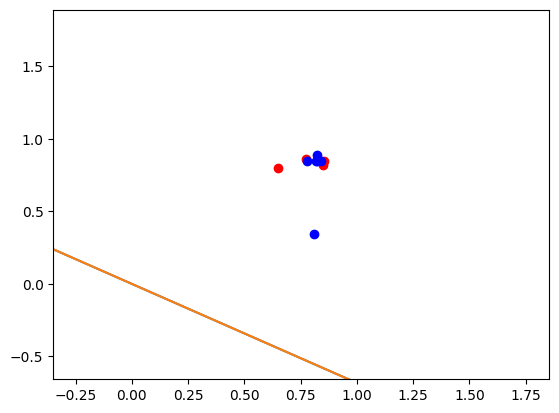


Epoch 10
Bobot: [-1.0, -0.15183031015001736, 0.18565298578490141, -0.28709434049804383]


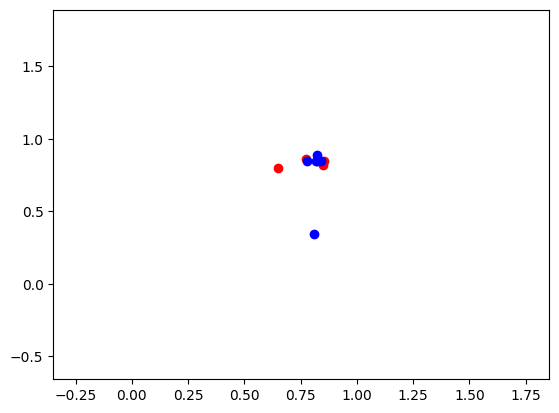

Bobot: [0.0, 0.6700841719961099, 1.030275908648028, 0.38201916371147426]


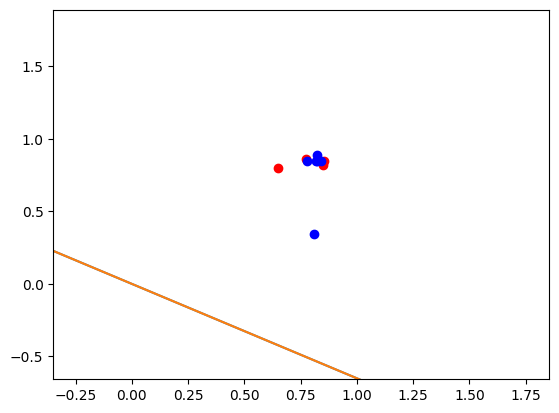

Bobot: [-1.0, -0.17932228060006183, 0.21208667378174606, -0.27123367621580885]


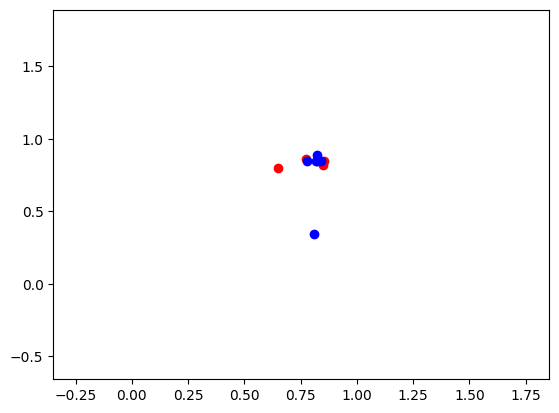

Bobot: [0.0, 0.6431095769938968, 1.1013680157757693, 0.3943209607857895]


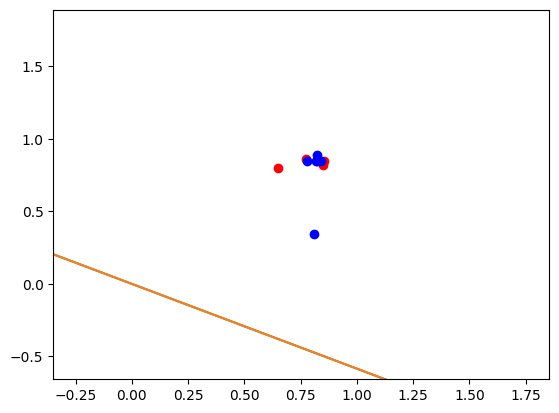

Bobot: [-1.0, -0.007024635339295537, 0.30325091366202506, -0.2063583194696269]


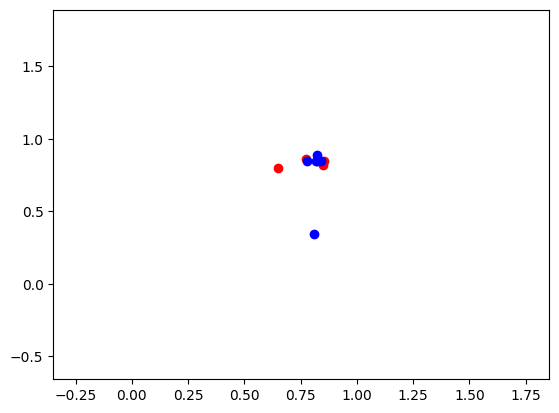

Bobot: [0.0, 0.7726113166122035, 1.149362969826814, 0.4585449270658031]


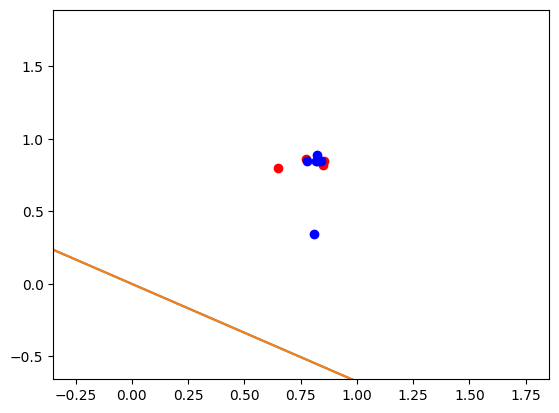

Epochs: 10
Accuracy: 0.5657894736842105


In [28]:
w, epoch = percep_fit(X_train, y_train, a=1, verbose=True, draw=True) ## Masukkan nilai learning rate sebesar 1
out = percep_predict(X_test, w)
accuracy = calc_accuracy(out, y_test)

print('Epochs:', epoch)
print('Accuracy:', accuracy)

**Pertanyaan**  
Dikarenakan training untuk mencapai akurasi 1.0 memakan waktu yang lama kita membatasi max epoch menjadi 10. Perhatikan bobot dari kedua proses training di atas. Bandingkan hasil yang didapatkan dan jelaskan apa pengaruh learning rate yang di masukkan!

Jawab:


**Learning rate besar (a=1):**

1.Sensitivitas tinggi terhadap perubahan pada bobot. Model belajar lebih cepat karena setiap pembaruan bobot terjadi dengan nilai yang signifikan.

Namun, karena terlalu sensitif, model bisa menjadi tidak stabil dan mengalami kesulitan dalam menemukan solusi optimal. Model mungkin melakukan pembaruan yang terlalu besar, sehingga melewati atau "oscillate" di sekitar solusi terbaik, yang dapat memperlambat proses konvergensi atau menyebabkan model tidak pernah mencapai akurasi maksimal.

2.Waktu training relatif lebih singkat karena bobot berubah lebih cepat, namun akurasi bisa terpengaruh jika pembaruan terlalu drastis.

**Learning rate kecil (a=0.0001):**

1.Sensitivitas rendah, menyebabkan bobot berubah sangat perlahan. Model belajar dengan lebih stabil dan halus, mengurangi risiko pembaruan yang berlebihan.

Karena pembaruan bobot yang kecil, model memerlukan waktu lebih lama untuk mencapai konvergensi. Jika epoch dibatasi (seperti dalam kasus ini), model mungkin tidak cukup waktu untuk mencapai akurasi optimal karena pembaruan yang terlalu lambat.

2.Waktu training lebih lama untuk mencapai hasil yang optimal, namun proses belajar lebih stabil dan terkendali.

**KESIMPULAN:**
**Learning rate yang lebih besar memungkinkan model belajar lebih cepat, tetapi bisa menjadi terlalu sensitif dan kurang stabil. Sedangkan, learning rate yang lebih kecil memberikan kestabilan lebih baik, namun membutuhkan waktu lebih lama untuk mencapai hasil optimal, terutama jika jumlah epoch dibatasi.**